In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
ps_data=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')

In [10]:
ps_data=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
ps_data=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')

In [14]:
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_grand,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated App,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above Average App,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated App,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated App,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated App,0.0,2018


In [15]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   int64  
 4   Size            7167 non-null   float64
 5   Installs        8892 non-null   int64  
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8892 non-null   object 
 12  Android Ver     8892 non-null   object 
 13  Log_Installs    8892 non-null   float64
 14  Log_Reviews     8892 non-null   float64
 15  Rating_grand    8892 non-null   object 
 16  Revenue         8892 non-null   float64
 17  Year            8892 non-null   i

In [16]:
ps_data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,1725
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [17]:
np.dtype(ps_data['Rating'])

dtype('float64')

In [18]:
ps_data.describe()

,Rating,Reviews,Size,Installs,Price,Log_Installs,Log_Reviews,Revenue,Year
count,8892.000000,8.892000e+03,7167.000000,8.892000e+03,8892.000000,8892.000000,8892.000000,8.892000e+03,8892.000000
mean,4.187877,4.727764e+05,23.547956,1.648965e+07,0.963155,12.179472,8.234893,4.131252e+04,2017.401484
std,0.522377,2.905052e+06,23.460103,8.637600e+07,16.189341,3.837372,3.880200,1.172795e+06,1.116673
min,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2010.000000
25%,4.000000,1.640000e+02,5.700000,1.000000e+04,0.000000,9.210340,5.099866,0.000000e+00,2017.000000
50%,4.300000,4.714500e+03,15.000000,5.000000e+05,0.000000,13.122363,8.458398,0.000000e+00,2018.000000
75%,4.500000,7.126675e+04,34.000000,5.000000e+06,0.000000,15.424948,11.174185,0.000000e+00,2018.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,20.723266,18.174247,6.990000e+07,2018.000000


In [19]:
ps_data['Rating'].dropna(inplace=True)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
review_data=pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

In [22]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [23]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [24]:
#pd.read_csv() : csv files
#pd.read_excel() : excel files
#pd.read_sql() : SQL Databases
#pd.read_json() : JSON Files

In [25]:
#df.isnull() : Missing values
#df.dropna() : Removes rows and columns that contain the missing values
#df.fillna() : Fills missing values

In [26]:
#df.duplicated() : Identifies duplicates
#df.drop_duplicates() : Removes duplicate rows

In [27]:
#Step 2 : Data Cleaning
ps_data = ps_data.dropna(subset=['Rating'])
for column in ps_data.columns :
    ps_data[column].fillna(ps_data[column].mode()[0],inplace=True)
ps_data.drop_duplicates(inplace=True)
ps_data=ps_data[ps_data['Rating']<=5]
review_data.dropna(subset=['Translated_Review'],inplace=True)

In [28]:
#Convert the Installs columns to numeric by removing commas and +
#ps_data['Installs'] = ps_data['Installs'].str.replace(',','')

# Ensure 'Installs' is of string type before using .str.replace()
ps_data['Installs'] = ps_data['Installs'].astype(str).str.replace(',', '').str.replace('+', '')

# Now, convert 'Installs' to numeric after cleaning
ps_data['Installs'] = pd.to_numeric(ps_data['Installs'])

In [29]:
ps_data['Installs'] = pd.to_numeric(ps_data['Installs'])

In [30]:
#Convert Price column to numeric after removing $
ps_data['Price'] = ps_data['Price'].astype(str).str.replace('$', '').str.replace('$','')

In [31]:
ps_data['Price'] = ps_data['Price'].astype(float)

In [32]:
ps_data.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [33]:
# merge tables using python code
# how='inner'--> like a joins left join,right join
merged_data = pd.merge(ps_data, review_data, on='App',how='inner')

In [34]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59124 entries, 0 to 59123
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     59124 non-null  object 
 1   Category                59124 non-null  object 
 2   Rating                  59124 non-null  float64
 3   Reviews                 59124 non-null  int64  
 4   Size                    59124 non-null  float64
 5   Installs                59124 non-null  int64  
 6   Type                    59124 non-null  object 
 7   Price                   59124 non-null  float64
 8   Content Rating          59124 non-null  object 
 9   Genres                  59124 non-null  object 
 10  Last Updated            59124 non-null  object 
 11  Current Ver             59124 non-null  object 
 12  Android Ver             59124 non-null  object 
 13  Log_Installs            59124 non-null  float64
 14  Log_Reviews             59124 non-null

In [35]:
# Data Transformation

In [36]:
ps_data['Reviews'] = pd.to_numeric(ps_data['Reviews'])

In [37]:
# data size change
'''def convert_size(size):
  if 'M' in size:
    return float(size.replace('M',''))
  elif 'K' in size:
    return float(size.replace('K',''))/1024
  else:
    return np.nan
ps_data['Size']=ps_data['Size'].apply(convert_size)'''

# Define a function to convert size
def convert_size(size):
    # Check if size is a string first
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'K' in size:
            return float(size.replace('K', '')) / 1024  # Convert K to M
        else:
            return np.nan  # If it's not in 'M' or 'K', return NaN
    elif isinstance(size, float):
        return size  # If it's already a float, return it
    else:
        return np.nan  # If none of the above, return NaN

# Apply the function to the Size column
ps_data['Size'] = ps_data['Size'].apply(convert_size)


In [38]:
#logarithmic
ps_data['Log_Installs'] = np.log(ps_data['Installs'])
ps_data['Log_Reviews'] = np.log(ps_data['Reviews'])

In [39]:
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_grand,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated App,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above Average App,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated App,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated App,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated App,0.0,2018


In [40]:
def rating_grand(rating):
  if rating >= 4:
    return 'Top rated App'
  elif rating >= 3:
    return 'Above Average App'
  elif rating >= 2:
    return 'Average App'
  else:
    return 'Below Average App'
ps_data['Rating_grand']=ps_data['Rating'].apply(rating_grand)

In [41]:
# Revenue column
ps_data['Revenue'] = ps_data['Price']*ps_data['Installs']

In [42]:
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [43]:
#Polarity Scores in STA
#Positive, Negative, Neutral and Compound(Close to -1 Very negative, +1 Very Positive)

In [44]:
review = 'This app is amazing! I love the new features.'
sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [45]:
review2 = 'This app is not amazing! I rate it 1/10.'
sentiment_score2 = sia.polarity_scores(review2)
print(sentiment_score2)

{'neg': 0.325, 'neu': 0.675, 'pos': 0.0, 'compound': -0.521}


In [46]:
review3 = 'This app is ok! I rate it 4.9/10.'
sentiment_score3 = sia.polarity_scores(review3)
print(sentiment_score3)

{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.3595}


In [47]:
#load review data

In [48]:
review_data['sentiment_scores'] = review_data['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [49]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,sentiment_scores
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [50]:
ps_data['Last Updated'] = pd.to_datetime(ps_data['Last Updated'],errors='coerce')

In [51]:
ps_data['Year'] = ps_data['Last Updated'].dt.year

In [53]:
# Static Visualizations: Fixed images or plots, non interactive
# Interactive Visualizations:

In [54]:
#1. Create a scatter plot to visualize the relationship between revenue and the number of installs for paid apps only. Add a trendline to show the correlation and color-code the points based on app categories.

#2. Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3 app categories. Apply filters to exclude apps with fewer than 10,000 installs and revenue below
#$10,000 and android version should be more than 4.0 as well as size should be more than 15M and content rating should be Everyone and app name should not have more than 30 characters including space and special character

#3. Plot a time series line chart to show the trend of total installs over time, segmented by app category. Highlight periods of significant growth by shading the areas under the curve where the increase
#in installs exceeds 20% month-over-month and content rating should be teen and app name should start with letter ‘E’ and installs should be more than 10k as well as this chart should work between 4 Pm to 8Pm

Task 1: Scatter Plot with Trendline for Paid Apps

We will first filter the data for paid apps, then create a scatter plot to visualize the relationship between revenue and installs. We will also color-code the apps by category and add a trendline to show correlation.

In [55]:
# Scatter plot: Revenue vs Installs for Paid Apps
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Installs', y='Revenue', hue='Category', data=paid_apps, palette='Set1')

# Fit a trendline
X = paid_apps['Installs'].values.reshape(-1, 1)
y = paid_apps['Revenue'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)
trendline = model.predict(X)

# Plot the trendline
plt.plot(paid_apps['Installs'], trendline, color='blue', linewidth=2)
plt.title('Revenue vs Installs for Paid Apps (With Trendline)')
plt.xlabel('Number of Installs')
plt.ylabel('Revenue')
plt.show()



NameError: name 'paid_apps' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ps_data=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')

In [ ]:
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_grand,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated App,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above Average App,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated App,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated App,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated App,0.0,2018


In [ ]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   int64  
 4   Size            7167 non-null   float64
 5   Installs        8892 non-null   int64  
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8892 non-null   object 
 12  Android Ver     8892 non-null   object 
 13  Log_Installs    8892 non-null   float64
 14  Log_Reviews     8892 non-null   float64
 15  Rating_grand    8892 non-null   object 
 16  Revenue         8892 non-null   float64
 17  Year            8892 non-null   i

In [ ]:
ps_data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,1725
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
np.dtype(ps_data['Rating'])

dtype('float64')

In [ ]:
ps_data.describe()

,Rating,Reviews,Size,Installs,Price,Log_Installs,Log_Reviews,Revenue,Year
count,8892.000000,8.892000e+03,7167.000000,8.892000e+03,8892.000000,8892.000000,8892.000000,8.892000e+03,8892.000000
mean,4.187877,4.727764e+05,23.547956,1.648965e+07,0.963155,12.179472,8.234893,4.131252e+04,2017.401484
std,0.522377,2.905052e+06,23.460103,8.637600e+07,16.189341,3.837372,3.880200,1.172795e+06,1.116673
min,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2010.000000
25%,4.000000,1.640000e+02,5.700000,1.000000e+04,0.000000,9.210340,5.099866,0.000000e+00,2017.000000
50%,4.300000,4.714500e+03,15.000000,5.000000e+05,0.000000,13.122363,8.458398,0.000000e+00,2018.000000
75%,4.500000,7.126675e+04,34.000000,5.000000e+06,0.000000,15.424948,11.174185,0.000000e+00,2018.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,20.723266,18.174247,6.990000e+07,2018.000000


In [ ]:
ps_data['Rating'].dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
review_data=pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

In [ ]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#pd.read_csv() : csv files
#pd.read_excel() : excel files
#pd.read_sql() : SQL Databases
#pd.read_json() : JSON Files

In [ ]:
#df.isnull() : Missing values
#df.dropna() : Removes rows and columns that contain the missing values
#df.fillna() : Fills missing values

In [ ]:
#df.duplicated() : Identifies duplicates
#df.drop_duplicates() : Removes duplicate rows

In [ ]:
#Step 2 : Data Cleaning
ps_data = ps_data.dropna(subset=['Rating'])
for column in ps_data.columns :
    ps_data[column].fillna(ps_data[column].mode()[0],inplace=True)
ps_data.drop_duplicates(inplace=True)
ps_data=ps_data[ps_data['Rating']<=5]
review_data.dropna(subset=['Translated_Review'],inplace=True)

In [ ]:
#Convert the Installs columns to numeric by removing commas and +
#ps_data['Installs'] = ps_data['Installs'].str.replace(',','')

# Ensure 'Installs' is of string type before using .str.replace()
ps_data['Installs'] = ps_data['Installs'].astype(str).str.replace(',', '').str.replace('+', '')

# Now, convert 'Installs' to numeric after cleaning
ps_data['Installs'] = pd.to_numeric(ps_data['Installs'])

In [ ]:
ps_data['Installs'] = pd.to_numeric(ps_data['Installs'])

In [ ]:
#Convert Price column to numeric after removing $
ps_data['Price'] = ps_data['Price'].astype(str).str.replace('$', '').str.replace('$','')

In [ ]:
ps_data['Price'] = ps_data['Price'].astype(float)

In [ ]:
ps_data.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [ ]:
# merge tables using python code
# how='inner'--> like a joins left join,right join
merged_data = pd.merge(ps_data, review_data, on='App',how='inner')

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59124 entries, 0 to 59123
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     59124 non-null  object 
 1   Category                59124 non-null  object 
 2   Rating                  59124 non-null  float64
 3   Reviews                 59124 non-null  int64  
 4   Size                    59124 non-null  float64
 5   Installs                59124 non-null  int64  
 6   Type                    59124 non-null  object 
 7   Price                   59124 non-null  float64
 8   Content Rating          59124 non-null  object 
 9   Genres                  59124 non-null  object 
 10  Last Updated            59124 non-null  object 
 11  Current Ver             59124 non-null  object 
 12  Android Ver             59124 non-null  object 
 13  Log_Installs            59124 non-null  float64
 14  Log_Reviews             59124 non-null

In [ ]:
# Data Transformation

In [ ]:
ps_data['Reviews'] = pd.to_numeric(ps_data['Reviews'])

In [ ]:
# data size change
'''def convert_size(size):
  if 'M' in size:
    return float(size.replace('M',''))
  elif 'K' in size:
    return float(size.replace('K',''))/1024
  else:
    return np.nan
ps_data['Size']=ps_data['Size'].apply(convert_size)'''

# Define a function to convert size
def convert_size(size):
    # Check if size is a string first
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'K' in size:
            return float(size.replace('K', '')) / 1024  # Convert K to M
        else:
            return np.nan  # If it's not in 'M' or 'K', return NaN
    elif isinstance(size, float):
        return size  # If it's already a float, return it
    else:
        return np.nan  # If none of the above, return NaN

# Apply the function to the Size column
ps_data['Size'] = ps_data['Size'].apply(convert_size)


In [ ]:
#logarithmic
ps_data['Log_Installs'] = np.log(ps_data['Installs'])
ps_data['Log_Reviews'] = np.log(ps_data['Reviews'])

In [ ]:
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_grand,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated App,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above Average App,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated App,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated App,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated App,0.0,2018


In [ ]:
def rating_grand(rating):
  if rating >= 4:
    return 'Top rated App'
  elif rating >= 3:
    return 'Above Average App'
  elif rating >= 2:
    return 'Average App'
  else:
    return 'Below Average App'
ps_data['Rating_grand']=ps_data['Rating'].apply(rating_grand)

In [ ]:
# Revenue column
ps_data['Revenue'] = ps_data['Price']*ps_data['Installs']

In [ ]:
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#Polarity Scores in STA
#Positive, Negative, Neutral and Compound(Close to -1 Very negative, +1 Very Positive)

In [ ]:
review = 'This app is amazing! I love the new features.'
sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [ ]:
review2 = 'This app is not amazing! I rate it 1/10.'
sentiment_score2 = sia.polarity_scores(review2)
print(sentiment_score2)

{'neg': 0.325, 'neu': 0.675, 'pos': 0.0, 'compound': -0.521}


In [ ]:
review3 = 'This app is ok! I rate it 4.9/10.'
sentiment_score3 = sia.polarity_scores(review3)
print(sentiment_score3)

{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.3595}


In [ ]:
#load review data

In [ ]:
review_data['sentiment_scores'] = review_data['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [ ]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,sentiment_scores
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [ ]:
ps_data['Last Updated'] = pd.to_datetime(ps_data['Last Updated'],errors='coerce')

In [ ]:
ps_data['Year'] = ps_data['Last Updated'].dt.year

In [ ]:
import plotly.express as px
fig=px.bar(x=["A","B","C"],y=[1,3,2],title="Sample Bar Chart")
fig.show()

In [ ]:
#to save chart and create a html link so we can see the charts whenever we want.
fig.write_html("bar_chart.html")

In [ ]:
# Static Visualizations: Fixed images or plots, non interactive
# Interactive Visualizations:

In [ ]:
import os
html_files_path="./"
if not os.path.exists(html_files_path):
  os.makedirs(html_files_path)

In [ ]:
plot_containers=""

In [ ]:
# Save each Plotly figure to an HTML file
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')
    # Append the plot and its insight to plot_containers
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath, full_html=False, include_plotlyjs='inline')

In [ ]:
plot_width=400
plot_height=300
plot_bg_color='black'
text_color='white'
title_font={'size':16}
axis_font={'size':12}

In [ ]:
import plotly.io as pio
from tkinter import font
#figure 1
category_counts = ps_data['Category'].value_counts().nlargest(10)
fig1=px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={'x':'Category','y':'Count'},
    title='Top 10 Category on play store',
    color=category_counts.index,
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=400,
    height=300
)
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig1,"category Graph 1.html","The top category on the Play store are dominated by tools, entertainment, and productivity apps.")

In [ ]:
#Figure 2
type_counts=ps_data['Type'].value_counts()
fig2=px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='App Type Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu,
    width=400,
    height=300
)
fig2.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig2,"Type Graph 2.html","Most apps on the Playstore are free, indicating a strategy to attract users first and monetize through ads or in app purchases")

In [ ]:
#Figure 3
fig3=px.histogram(
    ps_data,
    x='Rating',
    nbins=20,
    title='Rating Distribution',
    color_discrete_sequence=['#636EFA'],
    width=400,
    height=300
)
fig3.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig3,"Rating Graph 3.html","Ratings are skewed towards higher values, suggesting that most apps are rated favorably by users")

In [ ]:
#Figure 4
sentiment_counts=review_data['sentiment_scores'].value_counts()
fig4=px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x':'sentiment_score','y':'Count'},
    title='Sentiment Distribution',
    color=sentiment_counts.index,
    color_discrete_sequence=px.colors.sequential.RdPu,
    width=400,
    height=300
)
fig4.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig4,"Sentiment Graph 4.html","Sentiments in reviews show a mix of positive and negative feedback, with a slight lean towards positive sentiments")

In [ ]:
#Figure 5
installs_by_category=ps_data.groupby('Category')['Installs'].sum().nlargest(10)
fig5=px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    orientation='h',
    labels={'x':'Installs','y':'Category'},
    title='Installs by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Blues,
    width=400,
    height=300
)
fig5.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig5,"Installs Graph 5.html","The categories with the most installs are social and communication apps, reflecting their broad appeal and daily usage")

In [ ]:
# Updates Per Year Plot
updates_per_year = ps_data['Last Updated'].dt.year.value_counts().sort_index()
fig6 = px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Updates'},
    title='Number of Updates Over the Years',
    color_discrete_sequence=['#AB63FA'],
    width=plot_width,
    height=plot_height
)
fig6.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig6, "Updates Graph 6.html", "Updates have been increasing over the years, showing that developers are actively maintaining and improving their apps.")

In [ ]:
#Figure 7
revenue_by_category=ps_data.groupby('Category')['Revenue'].sum().nlargest(10)
fig7=px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    labels={'x':'Category','y':'Revenue'},
    title='Revenue by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Greens,
    width=400,
    height=300
)
fig7.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig7,"Revenue Graph 7.html","Categories such as Business and Productivity lead in revenue generation, indicating their monetization potential")

In [ ]:
#Figure 8
genre_counts=ps_data['Genres'].str.split(';',expand=True).stack().value_counts().nlargest(10)
fig8=px.bar(
    x=genre_counts.index,
    y=genre_counts.values,
    labels={'x':'Genre','y':'Count'},
    title='Top Genres',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.OrRd,
    width=400,
    height=300
)
fig8.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig8,"Genre Graph 8.html","Action and Casual genres are the most common, reflecting users' preference for engaging and easy-to-play games")

In [ ]:
#Figure 9
fig9=px.scatter(
    ps_data,
    x='Last Updated',
    y='Rating',
    color='Type',
    title='Impact of Last Update on Rating',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    width=400,
    height=300
)
fig9.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig9,"Update Graph 9.html","The Scatter Plot shows a weak correlation between the last update and ratings, suggesting that more frequent updates dont always result in better ratings.")

In [ ]:
#Figure 10
fig10=px.box(
    ps_data,
    x='Type',
    y='Rating',
    color='Type',
    title='Rating for Paid vs Free Apps',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=400,
    height=300
)
fig10.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig10,"Paid Free Graph 10.html","Paid apps generally have higher ratings compared to free apps, suggesting that users expect higher quality from apps they pay for")

In [ ]:
plot_containers_split=plot_containers.split('</div>')

In [ ]:
if len(plot_containers_split) > 1:
    final_plot=plot_containers_split[-2]+'</div>'
else:
    final_plot=plot_containers

In [ ]:
dashboard_html= """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name=viewport" content="width=device-width,initial-scale-1.0">
    <title> Google Play Store Review Analytics</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify_content: center;
            padding: 20px;
        }}
        .plot-container {{
            border: 2px solid #555
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0,0,0,0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot-container: hover .insights {{
            display: block;
        }}
        </style>
        <script>
            function openPlot(filename) {{
                window.open(filename, '_blank');
                }}
        </script>
    </head>
    <body>
        <div class= "header">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
            <h1>Google Play Store Reviews Analytics</h1>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
        </div>
        <div class="container">
            {plots}
        </div>
    </body>
    </html>
    """


In [ ]:
final_html=dashboard_html.format(plots=plot_containers,plot_width=plot_width,plot_height=plot_height)

In [ ]:
dashboard_path=os.path.join(html_files_path,"web page.html")

In [ ]:
with open(dashboard_path, "w", encoding="utf-8") as f:
    f.write(final_html)

In [ ]:
df = pd.DataFrame(ps_data)

# Specify the path where the file will be saved
save_path = '/content/drive/MyDrive/Play Store Data1.csv'

# Save DataFrame to CSV
df.to_csv(save_path, index=False)

print(f"CSV saved at: {save_path}")

CSV saved at: /content/drive/MyDrive/Play Store Data1.csv


In [ ]:
#1. Create a scatter plot to visualize the relationship between revenue and the number of installs for paid apps only. Add a trendline to show the correlation and color-code the points based on app categories.

#2. Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3 app categories. Apply filters to exclude apps with fewer than 10,000 installs and revenue below
#$10,000 and android version should be more than 4.0 as well as size should be more than 15M and content rating should be Everyone and app name should not have more than 30 characters including space and special character

#3. Plot a time series line chart to show the trend of total installs over time, segmented by app category. Highlight periods of significant growth by shading the areas under the curve where the increase
#in installs exceeds 20% month-over-month and content rating should be teen and app name should start with letter ‘E’ and installs should be more than 10k as well as this chart should work between 4 Pm to 8Pm

Task 1: Scatter Plot with Trendline for Paid Apps

We will first filter the data for paid apps, then create a scatter plot to visualize the relationship between revenue and installs. We will also color-code the apps by category and add a trendline to show correlation.

In [56]:
# Scatter plot: Revenue vs Installs for Paid Apps
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Installs', y='Revenue', hue='Category', data=paid_apps, palette='Set1')

# Fit a trendline
X = paid_apps['Installs'].values.reshape(-1, 1)
y = paid_apps['Revenue'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)
trendline = model.predict(X)

# Plot the trendline
plt.plot(paid_apps['Installs'], trendline, color='blue', linewidth=2)
plt.title('Revenue vs Installs for Paid Apps (With Trendline)')
plt.xlabel('Number of Installs')
plt.ylabel('Revenue')
plt.show()


NameError: name 'paid_apps' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ps_data=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')

In [ ]:
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_grand,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated App,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above Average App,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated App,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated App,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated App,0.0,2018


In [ ]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   int64  
 4   Size            7167 non-null   float64
 5   Installs        8892 non-null   int64  
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8892 non-null   object 
 12  Android Ver     8892 non-null   object 
 13  Log_Installs    8892 non-null   float64
 14  Log_Reviews     8892 non-null   float64
 15  Rating_grand    8892 non-null   object 
 16  Revenue         8892 non-null   float64
 17  Year            8892 non-null   i

In [ ]:
ps_data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,1725
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
np.dtype(ps_data['Rating'])

dtype('float64')

In [ ]:
ps_data.describe()

,Rating,Reviews,Size,Installs,Price,Log_Installs,Log_Reviews,Revenue,Year
count,8892.000000,8.892000e+03,7167.000000,8.892000e+03,8892.000000,8892.000000,8892.000000,8.892000e+03,8892.000000
mean,4.187877,4.727764e+05,23.547956,1.648965e+07,0.963155,12.179472,8.234893,4.131252e+04,2017.401484
std,0.522377,2.905052e+06,23.460103,8.637600e+07,16.189341,3.837372,3.880200,1.172795e+06,1.116673
min,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2010.000000
25%,4.000000,1.640000e+02,5.700000,1.000000e+04,0.000000,9.210340,5.099866,0.000000e+00,2017.000000
50%,4.300000,4.714500e+03,15.000000,5.000000e+05,0.000000,13.122363,8.458398,0.000000e+00,2018.000000
75%,4.500000,7.126675e+04,34.000000,5.000000e+06,0.000000,15.424948,11.174185,0.000000e+00,2018.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,20.723266,18.174247,6.990000e+07,2018.000000


In [ ]:
ps_data['Rating'].dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
review_data=pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

In [ ]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#pd.read_csv() : csv files
#pd.read_excel() : excel files
#pd.read_sql() : SQL Databases
#pd.read_json() : JSON Files

In [ ]:
#df.isnull() : Missing values
#df.dropna() : Removes rows and columns that contain the missing values
#df.fillna() : Fills missing values

In [ ]:
#df.duplicated() : Identifies duplicates
#df.drop_duplicates() : Removes duplicate rows

In [ ]:
#Step 2 : Data Cleaning
ps_data = ps_data.dropna(subset=['Rating'])
for column in ps_data.columns :
    ps_data[column].fillna(ps_data[column].mode()[0],inplace=True)
ps_data.drop_duplicates(inplace=True)
ps_data=ps_data[ps_data['Rating']<=5]
review_data.dropna(subset=['Translated_Review'],inplace=True)

In [ ]:
#Convert the Installs columns to numeric by removing commas and +
#ps_data['Installs'] = ps_data['Installs'].str.replace(',','')

# Ensure 'Installs' is of string type before using .str.replace()
ps_data['Installs'] = ps_data['Installs'].astype(str).str.replace(',', '').str.replace('+', '')

# Now, convert 'Installs' to numeric after cleaning
ps_data['Installs'] = pd.to_numeric(ps_data['Installs'])

In [ ]:
ps_data['Installs'] = pd.to_numeric(ps_data['Installs'])

In [ ]:
#Convert Price column to numeric after removing $
ps_data['Price'] = ps_data['Price'].astype(str).str.replace('$', '').str.replace('$','')

In [ ]:
ps_data['Price'] = ps_data['Price'].astype(float)

In [ ]:
ps_data.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [ ]:
# merge tables using python code
# how='inner'--> like a joins left join,right join
merged_data = pd.merge(ps_data, review_data, on='App',how='inner')

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59124 entries, 0 to 59123
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     59124 non-null  object 
 1   Category                59124 non-null  object 
 2   Rating                  59124 non-null  float64
 3   Reviews                 59124 non-null  int64  
 4   Size                    59124 non-null  float64
 5   Installs                59124 non-null  int64  
 6   Type                    59124 non-null  object 
 7   Price                   59124 non-null  float64
 8   Content Rating          59124 non-null  object 
 9   Genres                  59124 non-null  object 
 10  Last Updated            59124 non-null  object 
 11  Current Ver             59124 non-null  object 
 12  Android Ver             59124 non-null  object 
 13  Log_Installs            59124 non-null  float64
 14  Log_Reviews             59124 non-null

In [ ]:
# Data Transformation

In [ ]:
ps_data['Reviews'] = pd.to_numeric(ps_data['Reviews'])

In [ ]:
# data size change
'''def convert_size(size):
  if 'M' in size:
    return float(size.replace('M',''))
  elif 'K' in size:
    return float(size.replace('K',''))/1024
  else:
    return np.nan
ps_data['Size']=ps_data['Size'].apply(convert_size)'''

# Define a function to convert size
def convert_size(size):
    # Check if size is a string first
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'K' in size:
            return float(size.replace('K', '')) / 1024  # Convert K to M
        else:
            return np.nan  # If it's not in 'M' or 'K', return NaN
    elif isinstance(size, float):
        return size  # If it's already a float, return it
    else:
        return np.nan  # If none of the above, return NaN

# Apply the function to the Size column
ps_data['Size'] = ps_data['Size'].apply(convert_size)


In [ ]:
#logarithmic
ps_data['Log_Installs'] = np.log(ps_data['Installs'])
ps_data['Log_Reviews'] = np.log(ps_data['Reviews'])

In [ ]:
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_grand,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated App,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above Average App,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated App,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated App,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated App,0.0,2018


In [ ]:
def rating_grand(rating):
  if rating >= 4:
    return 'Top rated App'
  elif rating >= 3:
    return 'Above Average App'
  elif rating >= 2:
    return 'Average App'
  else:
    return 'Below Average App'
ps_data['Rating_grand']=ps_data['Rating'].apply(rating_grand)

In [ ]:
# Revenue column
ps_data['Revenue'] = ps_data['Price']*ps_data['Installs']

In [ ]:
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#Polarity Scores in STA
#Positive, Negative, Neutral and Compound(Close to -1 Very negative, +1 Very Positive)

In [ ]:
review = 'This app is amazing! I love the new features.'
sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [ ]:
review2 = 'This app is not amazing! I rate it 1/10.'
sentiment_score2 = sia.polarity_scores(review2)
print(sentiment_score2)

{'neg': 0.325, 'neu': 0.675, 'pos': 0.0, 'compound': -0.521}


In [ ]:
review3 = 'This app is ok! I rate it 4.9/10.'
sentiment_score3 = sia.polarity_scores(review3)
print(sentiment_score3)

{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.3595}


In [ ]:
#load review data

In [ ]:
review_data['sentiment_scores'] = review_data['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [ ]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,sentiment_scores
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [ ]:
ps_data['Last Updated'] = pd.to_datetime(ps_data['Last Updated'],errors='coerce')

In [ ]:
ps_data['Year'] = ps_data['Last Updated'].dt.year

In [ ]:
import plotly.express as px
fig=px.bar(x=["A","B","C"],y=[1,3,2],title="Sample Bar Chart")
fig.show()

In [ ]:
#to save chart and create a html link so we can see the charts whenever we want.
fig.write_html("bar_chart.html")

In [ ]:
# Static Visualizations: Fixed images or plots, non interactive
# Interactive Visualizations:

In [ ]:
import os
html_files_path="./"
if not os.path.exists(html_files_path):
  os.makedirs(html_files_path)

In [ ]:
plot_containers=""

In [ ]:
# Save each Plotly figure to an HTML file
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')
    # Append the plot and its insight to plot_containers
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath, full_html=False, include_plotlyjs='inline')

In [ ]:
plot_width=400
plot_height=300
plot_bg_color='black'
text_color='white'
title_font={'size':16}
axis_font={'size':12}

In [ ]:
import plotly.io as pio
from tkinter import font
#figure 1
category_counts = ps_data['Category'].value_counts().nlargest(10)
fig1=px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={'x':'Category','y':'Count'},
    title='Top 10 Category on play store',
    color=category_counts.index,
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=400,
    height=300
)
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig1,"category Graph 1.html","The top category on the Play store are dominated by tools, entertainment, and productivity apps.")

In [ ]:
#Figure 2
type_counts=ps_data['Type'].value_counts()
fig2=px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='App Type Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu,
    width=400,
    height=300
)
fig2.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig2,"Type Graph 2.html","Most apps on the Playstore are free, indicating a strategy to attract users first and monetize through ads or in app purchases")

In [ ]:
#Figure 3
fig3=px.histogram(
    ps_data,
    x='Rating',
    nbins=20,
    title='Rating Distribution',
    color_discrete_sequence=['#636EFA'],
    width=400,
    height=300
)
fig3.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig3,"Rating Graph 3.html","Ratings are skewed towards higher values, suggesting that most apps are rated favorably by users")

In [ ]:
#Figure 4
sentiment_counts=review_data['sentiment_scores'].value_counts()
fig4=px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x':'sentiment_score','y':'Count'},
    title='Sentiment Distribution',
    color=sentiment_counts.index,
    color_discrete_sequence=px.colors.sequential.RdPu,
    width=400,
    height=300
)
fig4.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig4,"Sentiment Graph 4.html","Sentiments in reviews show a mix of positive and negative feedback, with a slight lean towards positive sentiments")

In [ ]:
#Figure 5
installs_by_category=ps_data.groupby('Category')['Installs'].sum().nlargest(10)
fig5=px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    orientation='h',
    labels={'x':'Installs','y':'Category'},
    title='Installs by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Blues,
    width=400,
    height=300
)
fig5.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig5,"Installs Graph 5.html","The categories with the most installs are social and communication apps, reflecting their broad appeal and daily usage")

In [ ]:
# Updates Per Year Plot
updates_per_year = ps_data['Last Updated'].dt.year.value_counts().sort_index()
fig6 = px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Updates'},
    title='Number of Updates Over the Years',
    color_discrete_sequence=['#AB63FA'],
    width=plot_width,
    height=plot_height
)
fig6.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig6, "Updates Graph 6.html", "Updates have been increasing over the years, showing that developers are actively maintaining and improving their apps.")

In [ ]:
#Figure 7
revenue_by_category=ps_data.groupby('Category')['Revenue'].sum().nlargest(10)
fig7=px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    labels={'x':'Category','y':'Revenue'},
    title='Revenue by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Greens,
    width=400,
    height=300
)
fig7.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig7,"Revenue Graph 7.html","Categories such as Business and Productivity lead in revenue generation, indicating their monetization potential")

In [ ]:
#Figure 8
genre_counts=ps_data['Genres'].str.split(';',expand=True).stack().value_counts().nlargest(10)
fig8=px.bar(
    x=genre_counts.index,
    y=genre_counts.values,
    labels={'x':'Genre','y':'Count'},
    title='Top Genres',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.OrRd,
    width=400,
    height=300
)
fig8.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig8,"Genre Graph 8.html","Action and Casual genres are the most common, reflecting users' preference for engaging and easy-to-play games")

In [ ]:
#Figure 9
fig9=px.scatter(
    ps_data,
    x='Last Updated',
    y='Rating',
    color='Type',
    title='Impact of Last Update on Rating',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    width=400,
    height=300
)
fig9.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig9,"Update Graph 9.html","The Scatter Plot shows a weak correlation between the last update and ratings, suggesting that more frequent updates dont always result in better ratings.")

In [ ]:
#Figure 10
fig10=px.box(
    ps_data,
    x='Type',
    y='Rating',
    color='Type',
    title='Rating for Paid vs Free Apps',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=400,
    height=300
)
fig10.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig10,"Paid Free Graph 10.html","Paid apps generally have higher ratings compared to free apps, suggesting that users expect higher quality from apps they pay for")

In [ ]:
plot_containers_split=plot_containers.split('</div>')

In [ ]:
if len(plot_containers_split) > 1:
    final_plot=plot_containers_split[-2]+'</div>'
else:
    final_plot=plot_containers

In [ ]:
dashboard_html= """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name=viewport" content="width=device-width,initial-scale-1.0">
    <title> Google Play Store Review Analytics</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify_content: center;
            padding: 20px;
        }}
        .plot-container {{
            border: 2px solid #555
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0,0,0,0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot-container: hover .insights {{
            display: block;
        }}
        </style>
        <script>
            function openPlot(filename) {{
                window.open(filename, '_blank');
                }}
        </script>
    </head>
    <body>
        <div class= "header">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
            <h1>Google Play Store Reviews Analytics</h1>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
        </div>
        <div class="container">
            {plots}
        </div>
    </body>
    </html>
    """


In [ ]:
final_html=dashboard_html.format(plots=plot_containers,plot_width=plot_width,plot_height=plot_height)

In [ ]:
dashboard_path=os.path.join(html_files_path,"web page.html")

In [ ]:
with open(dashboard_path, "w", encoding="utf-8") as f:
    f.write(final_html)

In [ ]:
df = pd.DataFrame(ps_data)

# Specify the path where the file will be saved
save_path = '/content/drive/MyDrive/Play Store Data1.csv'

# Save DataFrame to CSV
df.to_csv(save_path, index=False)

print(f"CSV saved at: {save_path}")

CSV saved at: /content/drive/MyDrive/Play Store Data1.csv


In [ ]:
#1. Create a scatter plot to visualize the relationship between revenue and the number of installs for paid apps only. Add a trendline to show the correlation and color-code the points based on app categories.

#2. Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3 app categories. Apply filters to exclude apps with fewer than 10,000 installs and revenue below
#$10,000 and android version should be more than 4.0 as well as size should be more than 15M and content rating should be Everyone and app name should not have more than 30 characters including space and special character

#3. Plot a time series line chart to show the trend of total installs over time, segmented by app category. Highlight periods of significant growth by shading the areas under the curve where the increase
#in installs exceeds 20% month-over-month and content rating should be teen and app name should start with letter ‘E’ and installs should be more than 10k as well as this chart should work between 4 Pm to 8Pm

Task 1: Scatter Plot with Trendline for Paid Apps

We will first filter the data for paid apps, then create a scatter plot to visualize the relationship between revenue and installs. We will also color-code the apps by category and add a trendline to show correlation.

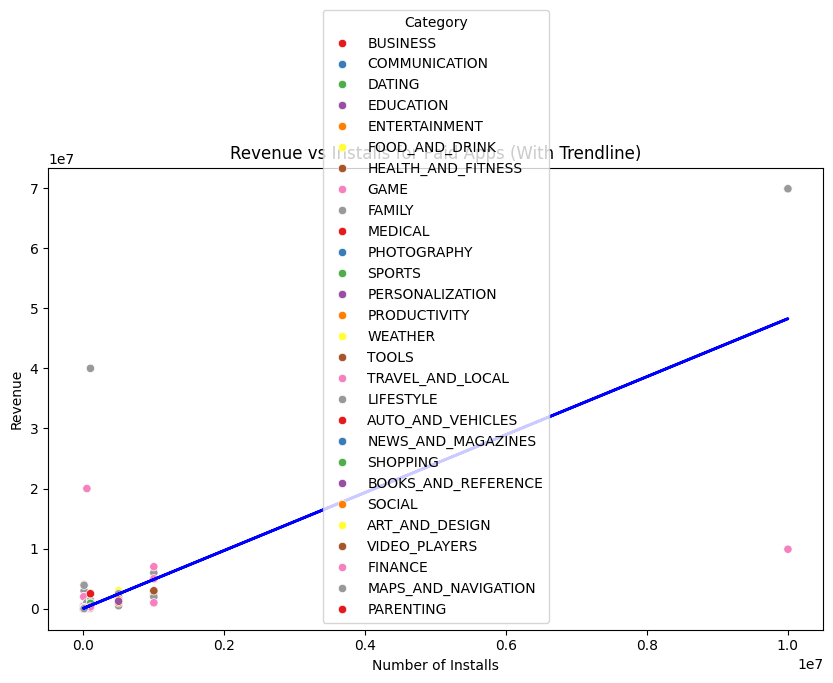

In [ ]:
# Scatter plot: Revenue vs Installs for Paid Apps
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Installs', y='Revenue', hue='Category', data=paid_apps, palette='Set1')

# Fit a trendline
X = paid_apps['Installs'].values.reshape(-1, 1)
y = paid_apps['Revenue'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)
trendline = model.predict(X)

# Plot the trendline
plt.plot(paid_apps['Installs'], trendline, color='blue', linewidth=2)
plt.title('Revenue vs Installs for Paid Apps (With Trendline)')
plt.xlabel('Number of Installs')
plt.ylabel('Revenue')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ps_data=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')

In [ ]:
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_grand,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated App,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above Average App,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated App,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated App,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated App,0.0,2018


In [ ]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   int64  
 4   Size            7167 non-null   float64
 5   Installs        8892 non-null   int64  
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8892 non-null   object 
 12  Android Ver     8892 non-null   object 
 13  Log_Installs    8892 non-null   float64
 14  Log_Reviews     8892 non-null   float64
 15  Rating_grand    8892 non-null   object 
 16  Revenue         8892 non-null   float64
 17  Year            8892 non-null   i

In [ ]:
ps_data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,1725
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
np.dtype(ps_data['Rating'])

dtype('float64')

In [ ]:
ps_data.describe()

,Rating,Reviews,Size,Installs,Price,Log_Installs,Log_Reviews,Revenue,Year
count,8892.000000,8.892000e+03,7167.000000,8.892000e+03,8892.000000,8892.000000,8892.000000,8.892000e+03,8892.000000
mean,4.187877,4.727764e+05,23.547956,1.648965e+07,0.963155,12.179472,8.234893,4.131252e+04,2017.401484
std,0.522377,2.905052e+06,23.460103,8.637600e+07,16.189341,3.837372,3.880200,1.172795e+06,1.116673
min,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2010.000000
25%,4.000000,1.640000e+02,5.700000,1.000000e+04,0.000000,9.210340,5.099866,0.000000e+00,2017.000000
50%,4.300000,4.714500e+03,15.000000,5.000000e+05,0.000000,13.122363,8.458398,0.000000e+00,2018.000000
75%,4.500000,7.126675e+04,34.000000,5.000000e+06,0.000000,15.424948,11.174185,0.000000e+00,2018.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,20.723266,18.174247,6.990000e+07,2018.000000


In [ ]:
ps_data['Rating'].dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
review_data=pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

In [ ]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#pd.read_csv() : csv files
#pd.read_excel() : excel files
#pd.read_sql() : SQL Databases
#pd.read_json() : JSON Files

In [ ]:
#df.isnull() : Missing values
#df.dropna() : Removes rows and columns that contain the missing values
#df.fillna() : Fills missing values

In [ ]:
#df.duplicated() : Identifies duplicates
#df.drop_duplicates() : Removes duplicate rows

In [ ]:
#Step 2 : Data Cleaning
ps_data = ps_data.dropna(subset=['Rating'])
for column in ps_data.columns :
    ps_data[column].fillna(ps_data[column].mode()[0],inplace=True)
ps_data.drop_duplicates(inplace=True)
ps_data=ps_data[ps_data['Rating']<=5]
review_data.dropna(subset=['Translated_Review'],inplace=True)

In [ ]:
#Convert the Installs columns to numeric by removing commas and +
#ps_data['Installs'] = ps_data['Installs'].str.replace(',','')

# Ensure 'Installs' is of string type before using .str.replace()
ps_data['Installs'] = ps_data['Installs'].astype(str).str.replace(',', '').str.replace('+', '')

# Now, convert 'Installs' to numeric after cleaning
ps_data['Installs'] = pd.to_numeric(ps_data['Installs'])

In [ ]:
ps_data['Installs'] = pd.to_numeric(ps_data['Installs'])

In [ ]:
#Convert Price column to numeric after removing $
ps_data['Price'] = ps_data['Price'].astype(str).str.replace('$', '').str.replace('$','')

In [ ]:
ps_data['Price'] = ps_data['Price'].astype(float)

In [ ]:
ps_data.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [ ]:
# merge tables using python code
# how='inner'--> like a joins left join,right join
merged_data = pd.merge(ps_data, review_data, on='App',how='inner')

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59124 entries, 0 to 59123
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     59124 non-null  object 
 1   Category                59124 non-null  object 
 2   Rating                  59124 non-null  float64
 3   Reviews                 59124 non-null  int64  
 4   Size                    59124 non-null  float64
 5   Installs                59124 non-null  int64  
 6   Type                    59124 non-null  object 
 7   Price                   59124 non-null  float64
 8   Content Rating          59124 non-null  object 
 9   Genres                  59124 non-null  object 
 10  Last Updated            59124 non-null  object 
 11  Current Ver             59124 non-null  object 
 12  Android Ver             59124 non-null  object 
 13  Log_Installs            59124 non-null  float64
 14  Log_Reviews             59124 non-null

In [ ]:
# Data Transformation

In [ ]:
ps_data['Reviews'] = pd.to_numeric(ps_data['Reviews'])

In [ ]:
# data size change
'''def convert_size(size):
  if 'M' in size:
    return float(size.replace('M',''))
  elif 'K' in size:
    return float(size.replace('K',''))/1024
  else:
    return np.nan
ps_data['Size']=ps_data['Size'].apply(convert_size)'''

# Define a function to convert size
def convert_size(size):
    # Check if size is a string first
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'K' in size:
            return float(size.replace('K', '')) / 1024  # Convert K to M
        else:
            return np.nan  # If it's not in 'M' or 'K', return NaN
    elif isinstance(size, float):
        return size  # If it's already a float, return it
    else:
        return np.nan  # If none of the above, return NaN

# Apply the function to the Size column
ps_data['Size'] = ps_data['Size'].apply(convert_size)


In [ ]:
#logarithmic
ps_data['Log_Installs'] = np.log(ps_data['Installs'])
ps_data['Log_Reviews'] = np.log(ps_data['Reviews'])

In [ ]:
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_grand,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated App,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above Average App,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated App,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated App,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated App,0.0,2018


In [ ]:
def rating_grand(rating):
  if rating >= 4:
    return 'Top rated App'
  elif rating >= 3:
    return 'Above Average App'
  elif rating >= 2:
    return 'Average App'
  else:
    return 'Below Average App'
ps_data['Rating_grand']=ps_data['Rating'].apply(rating_grand)

In [ ]:
# Revenue column
ps_data['Revenue'] = ps_data['Price']*ps_data['Installs']

In [ ]:
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#Polarity Scores in STA
#Positive, Negative, Neutral and Compound(Close to -1 Very negative, +1 Very Positive)

In [ ]:
review = 'This app is amazing! I love the new features.'
sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [ ]:
review2 = 'This app is not amazing! I rate it 1/10.'
sentiment_score2 = sia.polarity_scores(review2)
print(sentiment_score2)

{'neg': 0.325, 'neu': 0.675, 'pos': 0.0, 'compound': -0.521}


In [ ]:
review3 = 'This app is ok! I rate it 4.9/10.'
sentiment_score3 = sia.polarity_scores(review3)
print(sentiment_score3)

{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.3595}


In [ ]:
#load review data

In [ ]:
review_data['sentiment_scores'] = review_data['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [ ]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,sentiment_scores
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [ ]:
ps_data['Last Updated'] = pd.to_datetime(ps_data['Last Updated'],errors='coerce')

In [ ]:
ps_data['Year'] = ps_data['Last Updated'].dt.year

In [ ]:
#1. Create a scatter plot to visualize the relationship between revenue and the number of installs for paid apps only. Add a trendline to show the correlation and color-code the points based on app categories.

#2. Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3 app categories. Apply filters to exclude apps with fewer than 10,000 installs and revenue below
#$10,000 and android version should be more than 4.0 as well as size should be more than 15M and content rating should be Everyone and app name should not have more than 30 characters including space and special character

#3. Plot a time series line chart to show the trend of total installs over time, segmented by app category. Highlight periods of significant growth by shading the areas under the curve where the increase
#in installs exceeds 20% month-over-month and content rating should be teen and app name should start with letter ‘E’ and installs should be more than 10k as well as this chart should work between 4 Pm to 8Pm

Task 1: Scatter Plot with Trendline for Paid Apps

We will first filter the data for paid apps, then create a scatter plot to visualize the relationship between revenue and installs. We will also color-code the apps by category and add a trendline to show correlation.

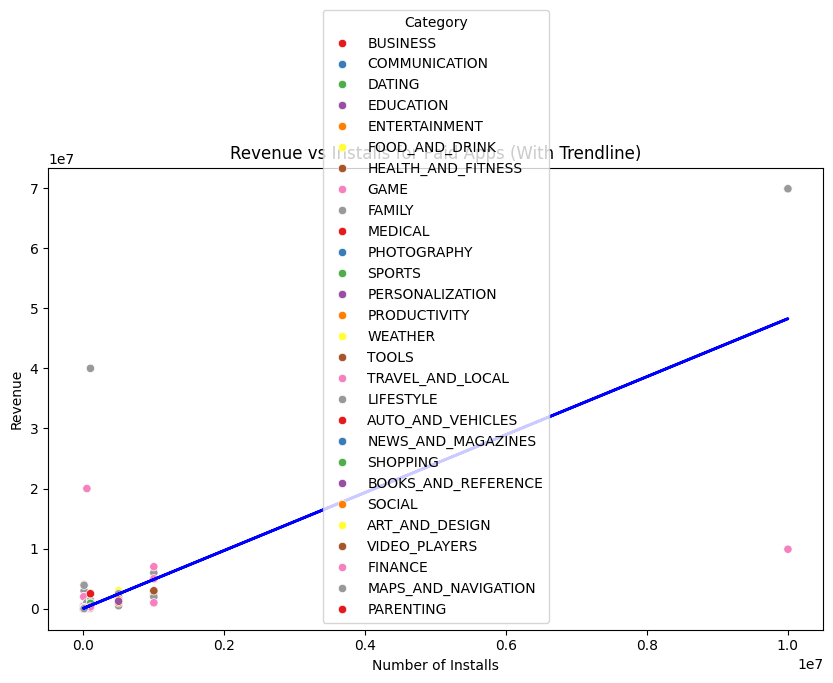

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Assume 'data' is your dataframe containing the apps data

# Filter for paid apps only
paid_apps = ps_data[(ps_data['Type'] == 'Paid')]

# Scatter plot: Revenue vs Installs for Paid Apps
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Installs', y='Revenue', hue='Category', data=paid_apps, palette='Set1')

# Fit a trendline
X = paid_apps['Installs'].values.reshape(-1, 1)
y = paid_apps['Revenue'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)
trendline = model.predict(X)

# Plot the trendline
plt.plot(paid_apps['Installs'], trendline, color='blue', linewidth=2)
plt.title('Revenue vs Installs for Paid Apps (With Trendline)')
plt.xlabel('Number of Installs')
plt.ylabel('Revenue')
plt.show()


Task 2: Dual-Axis Chart Comparing Free vs Paid Apps

We'll filter the data according to the specified conditions, and then create a dual-axis chart comparing the average installs and revenue for free vs. paid apps in the top 3 categories.

In [64]:
# Function to clean the 'Android Ver' column
def clean_android_version(version):
    try:
        # Extract numeric part of the version
        return float(version.split()[0])  # Split by space and take the first part
    except (ValueError, AttributeError):
        return np.nan  # Return NaN if conversion fails

# Apply the function to clean and convert the 'Android Ver' column
ps_data['Android Ver'] = ps_data['Android Ver'].apply(clean_android_version)

# Now filter the data after conversion
filtered_data = ps_data[
    (ps_data['Installs'] >= 10000) &
    (ps_data['Revenue'] >= 10000) &
    (ps_data['Android Ver'] > 4.0) &  # Now it should work
    (ps_data['Size'] > 15) &
    (ps_data['Content Rating'] == 'Everyone') &
    (ps_data['App'].str.len() <= 30)
]


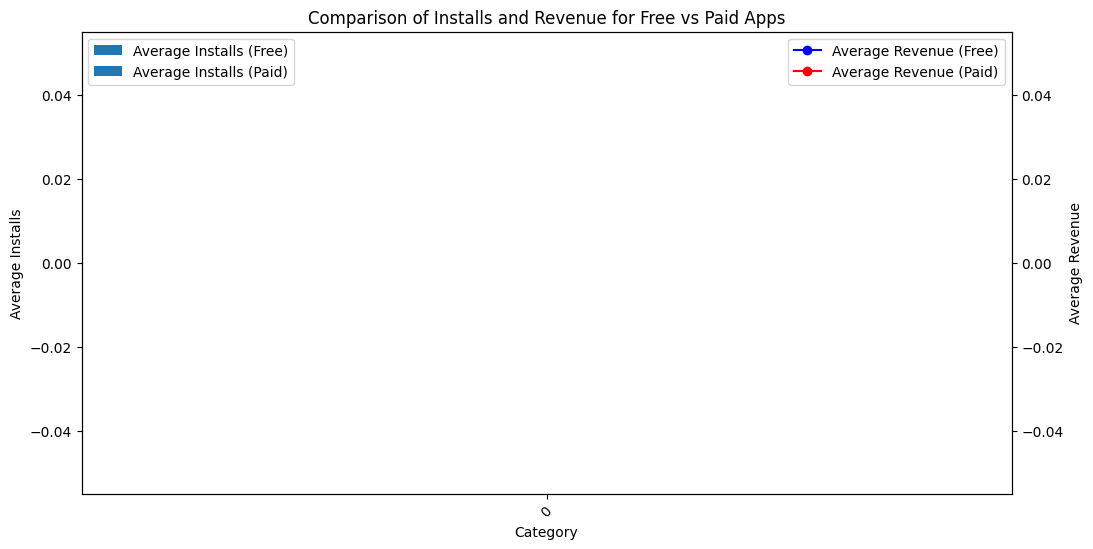

In [66]:
import matplotlib.ticker as ticker

# Apply filters
filtered_data = ps_data[
    (ps_data['Installs'] >= 10000) &
    (ps_data['Revenue'] >= 10000) &
    (ps_data['Android Ver'] > 4.0) &
    (ps_data['Size'] > 15) &
    (ps_data['Content Rating'] == 'Everyone') &
    (ps_data['App'].str.len() <= 30)
]

# Get the top 3 categories
top_3_categories = filtered_data['Category'].value_counts().nlargest(3).index
filtered_data = filtered_data[filtered_data['Category'].isin(top_3_categories)]

# Group by Type (Free/Paid) and Category
grouped_data = filtered_data.groupby(['Category', 'Type']).agg({
    'Installs': 'mean',
    'Revenue': 'mean'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average installs
grouped_data_free = grouped_data[grouped_data['Type'] == 'Free']
grouped_data_paid = grouped_data[grouped_data['Type'] == 'Paid']

ax1.bar(grouped_data_free['Category'], grouped_data_free['Installs'], color='b', label='Average Installs (Free)', alpha=0.7)
ax1.bar(grouped_data_paid['Category'], grouped_data_paid['Installs'], color='r', label='Average Installs (Paid)', alpha=0.7)

# Set labels for the primary axis
ax1.set_xlabel('Category')
ax1.set_ylabel('Average Installs')
ax1.set_title('Comparison of Installs and Revenue for Free vs Paid Apps')
ax1.legend(loc='upper left')

# Create a second y-axis for revenue
ax2 = ax1.twinx()
ax2.plot(grouped_data_free['Category'], grouped_data_free['Revenue'], color='b', marker='o', label='Average Revenue (Free)')
ax2.plot(grouped_data_paid['Category'], grouped_data_paid['Revenue'], color='r', marker='o', label='Average Revenue (Paid)')
ax2.set_ylabel('Average Revenue')

# Format ticks
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax1.tick_params(axis='x', rotation=45)
ax2.legend(loc='upper right')

plt.show()


Task 3: Time Series Line Chart (Trend of Total Installs)

We will create a time-series line chart showing the trend of total installs over time, filtered and segmented by app category. The time condition and growth highlighting will also be applied.

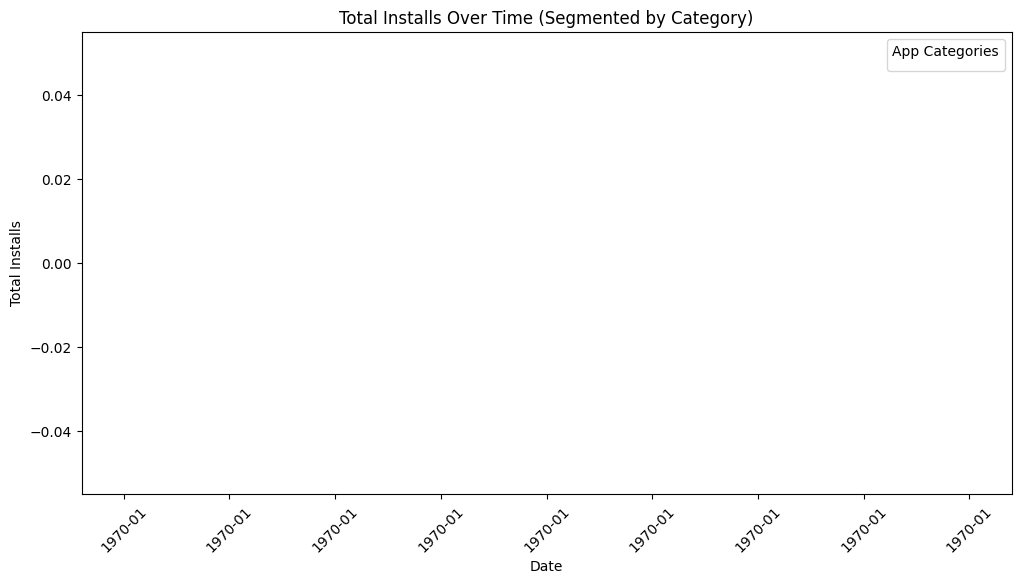

In [71]:
import matplotlib.dates as mdates

# Filter the data
filtered_time_data = ps_data[
    (ps_data['Installs'] > 10000) &
    (ps_data['Content Rating'] == 'Teen') &
    (ps_data['App'].str.startswith('E')) &
    (ps_data['Last Updated'].dt.hour >= 16) &  # Between 4PM to 8PM
    (ps_data['Last Updated'].dt.hour <= 20)
]

# Resample data by month to show installs over time
time_series_data = filtered_time_data.groupby([pd.Grouper(key='Last Updated', freq='M'), 'Category'])['Installs'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot time series for each category
for category in time_series_data['Category'].unique():
    category_data = time_series_data[time_series_data['Category'] == category]
    plt.plot(category_data['Install Date'], category_data['Installs'], label=category)

# Highlight significant growth areas (>20% MoM growth)
significant_growth = time_series_data.groupby('Category')['Installs'].pct_change() > 0.2
plt.fill_between(time_series_data['Last Updated'], 0, time_series_data['Installs'], where=significant_growth, color='green', alpha=0.3)

plt.title('Total Installs Over Time (Segmented by Category)')
plt.xlabel('Date')
plt.ylabel('Total Installs')
plt.legend(title='App Categories')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.show()
